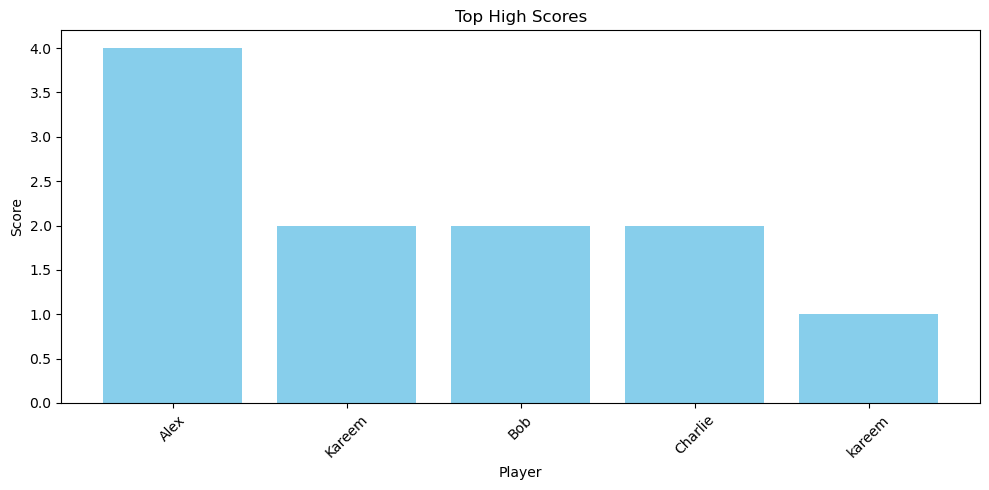

In [1]:
#import libraries
import random
import os
import tkinter as tk
from tkinter import font
from tkinter import messagebox, simpledialog
from matplotlib import pyplot as plt

#Global Functions
def load_words(file_name):
    """ Return the list of words from the file """
    
    if not os.path.exists(file_name):
        return []
    with open(file_name, 'r') as file:
        words = file.read().splitlines()
    return words

def save_words(file_name, words):
    """ Writes a list of words to a file """
    
    with open(file_name, 'w') as file:
        file.write("\n".join(words))

def load_high_scores(file_name):
    """ Returns the player's name and high score"""
    
    if not os.path.exists(file_name):
        return []
    with open(file_name, 'r') as file:
        scores = [line.strip().split(',') for line in file.readlines()]
    return [(name, int(score)) for name, score in scores]

def save_high_scores(file_name, high_scores):
    """ Writes high scores of the player to a file"""
    
    with open(file_name, 'w') as file:
        for name, score in high_scores:
            file.write(f"{name},{score}\n")

def scramble_word(word):
    """Shuffles its letters randomly, and returns the scrambled word."""
    
    scrambled = list(word)
    random.shuffle(scrambled)
    return ''.join(scrambled)

# Graphical User Interface (GUI) components
class ScrambleEggsApp(tk.Tk):
    """ ScrambleEggsApp class for creating a GUI for the Applocation"""
    
    def __init__(self):
        """ The constructor It initializesScrambleEggsApp objects (the game window, loads words and high scores, and sets up the main menu) """
        
        super().__init__() # inherits from the tk.TK
        
        self.title("Scramble Eggs App™️") #set name of the window
        self.geometry("800x300") #set the size of the window
        self.font = font.Font(family="Comic Sans MS", size=30, weight="bold", underline=True)

        self.words = load_words('wordlist.txt') 
        self.high_scores = load_high_scores('high_scores.txt')
        self.player_name = ""
        self.score = 0
        self.attempts = 0
        self.current_word = ""
        self.scrambled_word = ""
        
        self.instructions = "Instructions: Crack egg by deciphering the scrambled word egg. Enter word in textfield and submit answers using the 'crack button" 
        
        self.setup_main_menu()
        

    def setup_main_menu(self):
        """ Creates the main menu with buttons to start the game, manage the word list, or exit """
        
        for widget in self.winfo_children(): #to clear or reset the contents of a window 
            widget.destroy()
       
        tk.Label(self, text=" 🐥 MAIN MENU 🐥 ", font=self.font).pack(pady=5)
        tk.Button(self, text="PLAY \U0001F579", command=self.start_game,font=("Arial", 18)).pack(pady=10)
        tk.Button(self, text="WORD-NEST \U0001FABA", command=self.word_nest,font=("Arial", 18)).pack(pady=10)
        tk.Button(self, text="EGG-XIT \U0001F51A", command=self.quit,font=("Arial", 18)).pack(pady=10)

    def start_game(self):
        """ This method gets the player's name, initializes the score and attempts, and then calls play_game to begin the game """
        
        if not self.words:
            messagebox.showinfo("Ooops!", "Your Nest 🪹 is empty. Add words to the Nest.")
            return
        
        self.player_name = simpledialog.askstring("Don't be a Chicken 🐔","Enter your Profile Name:") # Creates textfield to enter name
        if not self.player_name:
            return

        self.score = 0
        self.attempts = 0
        self.play_game()

    def play_game(self):
        """ This method displays a scrambled egg (word), gets the player's guess, and checks if it's correct """
        
        for widget in self.winfo_children():
            widget.destroy()

        self.current_word = random.choice(self.words)
        self.scrambled_word = scramble_word(self.current_word)
        
        tk.Label(self, text=f"🥚Word-Egg🥚: {self.scrambled_word}", font=("Comic Sans MS", 24)).pack(pady=10)
        self.crack_entry = tk.Entry(self, font=("Arial", 14))
        self.crack_entry.pack(pady=20)
        tk.Button(self, text="Crack Egg 🍳", command=self.check_guess,font=("Arial", 18)).pack(pady=5)
        tk.Button(self, text="Quit Game 🚫", command=self.quit_game,font=("Arial", 18)).pack(pady=5)
        tk.Label(self, text=self.instructions, font=("Arial", 12)).pack(pady=20)
        
        
    def check_guess(self):
        """ This method evaluates the player's guess and updates the score""" 
        
        guess = self.crack_entry.get().strip().lower()
        self.attempts += 1

        if guess == self.current_word:
            self.score += 1
            messagebox.showinfo("Correct!", "Eggcellent! ✅ Good job")
        else:
            messagebox.showinfo("Wrong!", f"Incorrect.❌ The correct word was '{self.current_word}'.")

        self.current_word = random.choice(self.words)
        self.scrambled_word = scramble_word(self.current_word)

        if messagebox.askyesno("Next Round", "Do you want to play again?"): #then prompts the player to play another round or quit """
            self.play_game()
        else:
            self.quit_game()
            
    def quit_game(self):
        """ This method updates and saves high scores and then calls show_stats """
        
        self.high_scores.append((self.player_name, self.score))
        self.high_scores.sort(key=lambda x: x[1], reverse=True)
        self.high_scores = self.high_scores[:5]
        save_high_scores('high_scores.txt', self.high_scores)
        self.show_statistics()

    def show_statistics(self):
        """This method displays the game results and high scores, including a bar chart"""
        
        for widget in self.winfo_children():
            widget.destroy()

        tk.Label(self, text="🖲Game Over🖲", font=self.font).pack(pady=10)
        tk.Label(self, text=f"🏅 Your Score: {self.score}", font=("Comic Sans MS", 16)).pack(pady=5)
        tk.Label(self, text=f"⏱ Total Attempts: {self.attempts}", font=("Comic Sans MS", 16)).pack(pady=5)

        if self.high_scores:                                  #Checks to see if any high scores is recorded
            scores = [score for _, score in self.high_scores]
            names = [name for name, _ in self.high_scores]
            avg_score = sum(scores) / len(scores)             #Finds the average of the scores
            tk.Label(self, text=f"📊 Average Score: {avg_score:.2f}", font=("Comic Sans MS", 16)).pack(pady=5)
            tk.Label(self, text=f"🏆 Top Score: {self.high_scores[0][1]}", font=("Comic Sans MS", 16)).pack(pady=5)

            # Display bar chart
            plt.figure(figsize=(10, 5))
            plt.bar(names, scores, color='skyblue')
            plt.title("Top High Scores")
            plt.xlabel("Player")
            plt.ylabel("Score")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        tk.Button(self, text="⬅️Back to Main Menu", command=self.setup_main_menu, font = ("Arial", 18)).pack(pady=15)
    def quit(self):
            """ This method Dispay Good BYE """
            for widget in self.winfo_children():
                widget.destroy()
        
            tk.Label(self, text=" Good Bye", font=self.font).pack(pady=10)
            tk.Label(self, text=" Thanks for play Scramble Eggs App, You can download more games in the App Store📱", font=("Arial", 18)).pack(pady=10)


            
    def word_nest(self):
        """ This method to manages the word nest (add, delete, modify, show)"""
        
        for widget in self.winfo_children():
            widget.destroy()

        tk.Label(self, text="🛠 Word Nest Manager 🛠", font=self.font).pack(pady=15)
        tk.Label(self, text="1️⃣ Hatch a new word🐣" ,font=("Arial", 18)).pack(pady=5)
        tk.Label(self, text="2️⃣ Delete a word❌",font=("Arial", 18)).pack(pady=5)
        tk.Label(self, text="3️⃣ Modify a word✏️",font=("Arial", 18)).pack(pady=5)
        tk.Label(self, text="4️⃣ Show word nest🪺",font=("Arial", 18)).pack(pady=5)
        tk.Label(self, text="5️⃣ Back to Main Menu📲",font=("Arial", 18)).pack(pady=5)

        self.word_nest_options()

    def word_nest_options(self):
        """ This method creates a dialogue box for menu selection"""
        
        option = simpledialog.askstring("Word Nest Selection", "Enter your choice 🔢:")
        if option == '1':
            self.add_word()
        elif option == '2':
            self.delete_word()
        elif option == '3':
            self.modify_word()
        elif option == '4':
            self.show_word_list()
        elif option == '5':
            self.setup_main_menu()
        else:
            messagebox.showerror("Error", "⚠️ Invalid choice ⚠️ Please try again.")
            self.word_nest_options()

    def add_word(self):
        """ This method validates and add word to a text file """
        
        new_word = simpledialog.askstring("Hatch Word🐣", "Enter the word to add:")
        if new_word and new_word not in self.words:
            self.words.append(new_word)
            save_words('wordlist.txt', self.words)
            messagebox.showinfo("Success", f"Word '{new_word}' added.✅")
        elif new_word in self.words:
            messagebox.showinfo("Error", "‼️Word already exists‼️.")
        self.word_nest()

    def delete_word(self):
        """ This method deletes word to a text file"""
        
        word_to_delete = simpledialog.askstring("Delete Word❌", "Enter the word to delete:")
        if word_to_delete in self.words:
            self.words.remove(word_to_delete)
            save_words('wordlist.txt', self.words)
            messagebox.showinfo("Success", f"Word '{word_to_delete}' deleted.❌")
        else:
            messagebox.showinfo("Error", "⚠️Word not found⚠️")
        self.word_nest()

    def modify_word(self):
        """ This methods modifies word to a text file"""
        
        old_word = simpledialog.askstring("✏️Modify Word", "Enter the word to modify:")
        if old_word in self.words:
            new_word = simpledialog.askstring("Modify Word", "Enter the new word:")
            index = self.words.index(old_word)
            self.words[index] = new_word
            save_words('wordlist.txt', self.words)
            messagebox.showinfo("Success", f"Word '{old_word}' changed to '{new_word}'✅")
        else:
            messagebox.showinfo("Error", "⚠️Word not found⚠️")
        self.word_nest()

    def show_word_list(self):
        """ This methods displays all the word to a text file"""
        
        for widget in self.winfo_children():
            widget.destroy()

        tk.Label(self, text="🪺Word Nest🪺", font=self.font).pack(pady=10)
        for word in self.words:
            tk.Label(self, text=word, font=("Arial", 12)).pack(pady=2)

        tk.Button(self, text="Back to Word Nest Manager ⚙️", command=self.word_nest, font = ("Arial", 18)).pack(pady=5)
        tk.Button(self, text="Back to Main Menu 📲", command=self.setup_main_menu, font = ("Arial", 18)).pack(pady=5)

if __name__ == "__main__":  #ensures that this code only runs when the script is executed directly
    app = ScrambleEggsApp() #creates an instance of the game class, which creates the main window
    app.mainloop()          #starts the tkinter event loop, which keeps the window open and responsive to user interactions
